In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

plt.rcParams['figure.figsize'] = (11, 5)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'
plt.rc('font', size=16)

# Pre-processing

Let's see what data are available.

## Solar

Text(0.5, 1.0, 'Solar hourly generation')

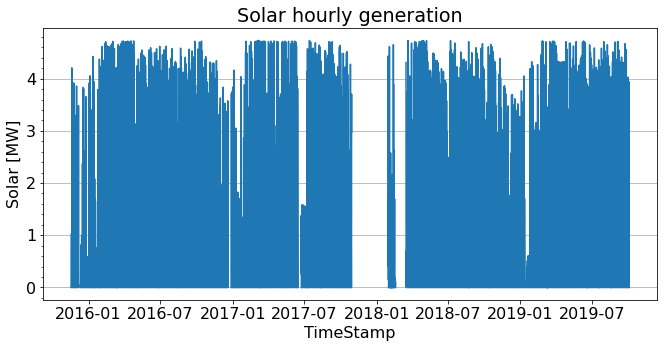

In [50]:
# Retrieve historical solar power data
all_data = pd.read_csv("data/solardata.csv", parse_dates=True, index_col='time')
all_hourly = all_data.resample('H').mean()

solar = all_hourly.inverted.to_numpy()
index = all_hourly.index

# convert to MW
solar /= 1e3

fig, ax = plt.subplots()
plt.plot(index, solar)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.grid(axis='y') 
plt.ylabel('Solar [MW]')
plt.xlabel('TimeStamp')
plt.title('Solar hourly generation')
# plt.savefig('plot_solar')

## Abbott

Text(0.5, 1.0, 'Abbott hourly generation')

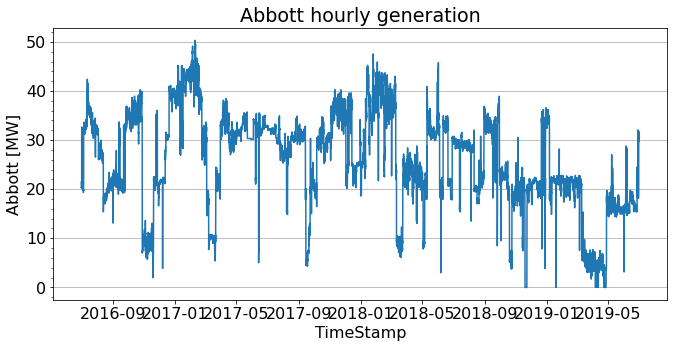

In [51]:
abbott_2017 = pd.read_csv("data/2017_abbott_generation.csv", parse_dates=True, index_col='date')
abbott_2018 = pd.read_csv("data/2018_abbott_generation.csv", parse_dates=True, index_col='date')
abbott_2019 = pd.read_csv("data/2019_abbott_generation.csv", parse_dates=True, index_col='date')

abbott_2017_vals = abbott_2017[['Value (KW)']].to_numpy()
abbott_2018_vals = abbott_2018[['Value (KW)']].to_numpy()
abbott_2019_vals = abbott_2019[['Value (KW)']].to_numpy()

index_2017 = abbott_2017.index
index_2018 = abbott_2018.index
index_2019 = abbott_2019.index

abbott = np.concatenate((abbott_2017_vals, abbott_2018_vals, abbott_2019_vals))
index = np.concatenate((index_2017, index_2018, index_2019))

# convert to MW
abbott /= 1e3

fig, ax = plt.subplots()
plt.plot(index, abbott)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.grid(axis='y') 
plt.ylabel('Abbott [MW]')
# plt.ylim([0, 9])
plt.xlabel('TimeStamp')
plt.title('Abbott hourly generation')
# plt.savefig('plot_wind')


## Imported electricity

Text(0.5, 1.0, 'Ameren hourly purchase')

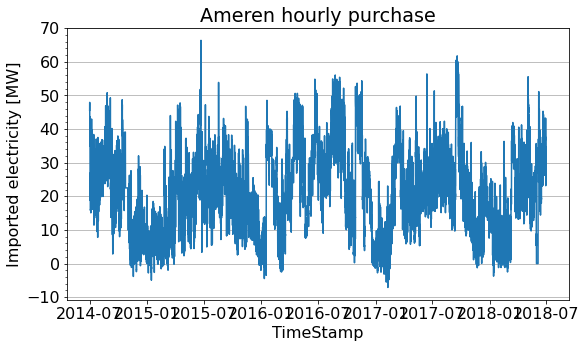

In [48]:
imported = pd.read_excel("data/amerenimports_2015_2019.xlsx", skiprows=2, index_col='Time')
imported.index = (imported.index - pd.Timedelta(minutes=27))

imported_vals = imported.Value.to_numpy()
index = imported.index

# convert to MW
imported_vals /= 1e3

fig, ax = plt.subplots()
plt.plot(index, imported_vals)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.grid(axis='y') 
plt.ylabel('Imported electricity [MW]')
# plt.ylim([0, 9])
plt.xlabel('TimeStamp')
plt.title('Ameren hourly purchase')


## Wind

['2016-11-01T01:00:00.000000000' '2016-11-01T02:00:00.000000000'
 '2016-11-01T03:00:00.000000000' ... '2019-06-30T21:00:00.000000000'
 '2019-06-30T22:00:00.000000000' '2019-06-30T23:00:00.000000000']


Text(0.5, 1.0, 'Wind hourly generation')

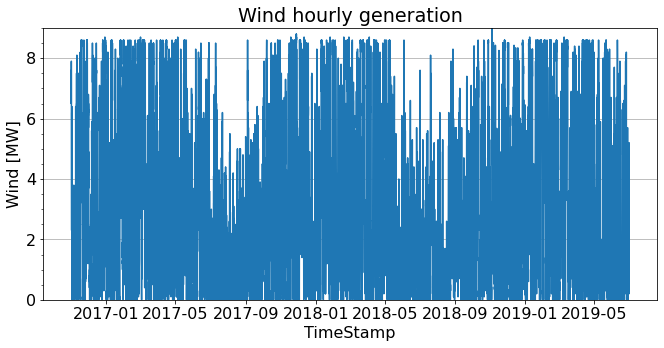

In [43]:
# Retrieve historical wind power data
df = pd.read_csv("data/railsplitter-data.csv", parse_dates=True, index_col='Time')
grouped = df.groupby(df.index.year)
wind_2016 = grouped.get_group(2016)
wind_2017 = grouped.get_group(2017)
wind_2018 = grouped.get_group(2018)
wind_2019 = grouped.get_group(2019)

w2016 = wind_2016.MWh.to_numpy()
w2017 = wind_2017.MWh.to_numpy()
w2018 = wind_2018.MWh.to_numpy()
w2019 = wind_2019.MWh.to_numpy()

index_2016 = wind_2016.index
index_2017 = wind_2017.index
index_2018 = wind_2018.index
index_2019 = wind_2019.index

wind = np.concatenate((w2016, w2017, w2018, w2019))
index = np.concatenate((index_2016, index_2017, index_2018, index_2019))

print(index)

fig, ax = plt.subplots()
plt.plot(index, wind)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(axis='y') 
plt.ylabel('Wind [MW]')
plt.ylim([0, 9])
plt.xlabel('TimeStamp')
plt.title('Wind hourly generation')
# plt.savefig('plot_wind')

## Demand

Text(0.5, 1.0, 'Campus hourly electricity demand')

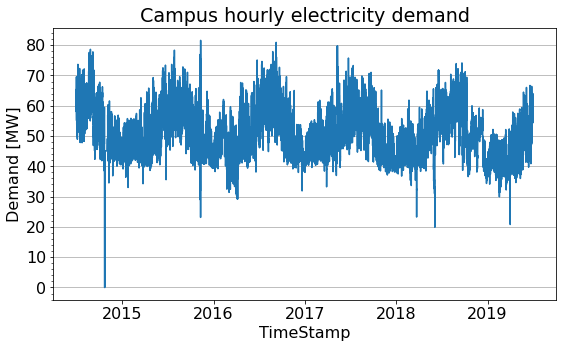

In [35]:
df = pd.read_csv("data/2014_2019_uiuc_electricity_demand.csv",
                 parse_dates=True,
                 usecols=['time', 'kw'],
                 index_col = ['time'])

demand = df.kw.to_numpy()
index = df.index

fig, ax = plt.subplots()
plt.plot(index, demand/1e3)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.grid(axis='y') 
plt.ylabel('Demand [MW]')
plt.xlabel('TimeStamp')
plt.title('Campus hourly electricity demand')
# plt.savefig('plot_demand')

# Processing

* Let's focus on 2017-1 to 2017-12.
* Let's remove extraneous values as well.

## Solar

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-30 15:00:00', '2017-12-30 16:00:00',
               '2017-12-30 17:00:00', '2017-12-30 18:00:00',
               '2017-12-30 19:00:00', '2017-12-30 20:00:00',
               '2017-12-30 21:00:00', '2017-12-30 22:00:00',
               '2017-12-30 23:00:00', '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', name='time', length=8736, freq='H')


Text(0.5, 1.0, 'Solar hourly generation')

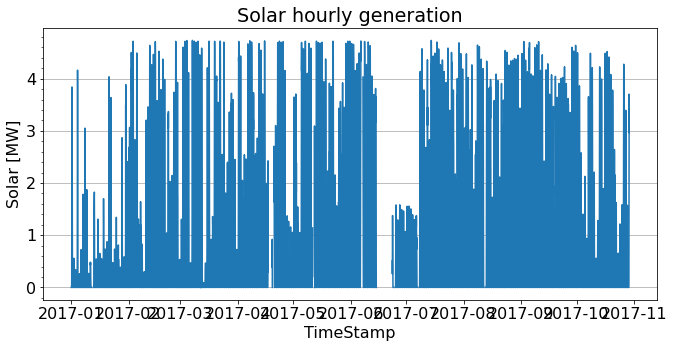

In [2]:
# Retrieve historical solar power data
all_data = pd.read_csv("data/solardata.csv", parse_dates=True, index_col='time')
all_hourly = all_data.resample('H').mean()

mask = (all_hourly.index > '2017-1-1') & (all_hourly.index <= '2017-12-31')
newdf = all_hourly.loc[mask]
solar = newdf.inverted.to_numpy()
index = newdf.index

print(index)

# convert to MW
solar /= 1e3

fig, ax = plt.subplots()
plt.plot(index, solar)
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.grid(axis='y') 
plt.ylabel('Solar [MW]')
plt.xlabel('TimeStamp')
plt.title('Solar hourly generation')
# plt.savefig('plot_solar')

## Abbott

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-30 15:00:00', '2017-12-30 16:00:00',
               '2017-12-30 17:00:00', '2017-12-30 18:00:00',
               '2017-12-30 19:00:00', '2017-12-30 20:00:00',
               '2017-12-30 21:00:00', '2017-12-30 22:00:00',
               '2017-12-30 23:00:00', '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', name='date', length=8736, freq=None)


Text(0.5, 1.0, 'Abbott hourly generation')

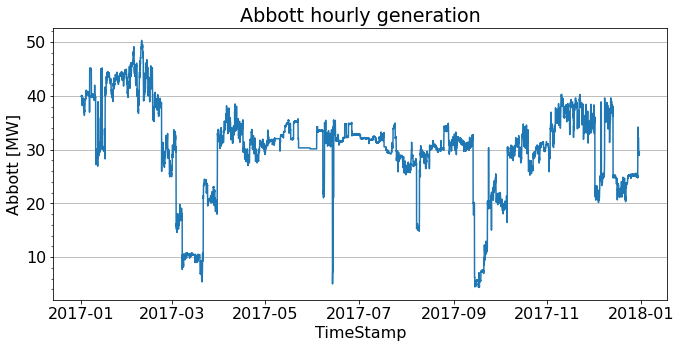

In [3]:
abbot_2017 = pd.read_csv("data/2017_abbott_generation.csv", parse_dates=True, index_col='date')
abbot_2018 = pd.read_csv("data/2018_abbott_generation.csv", parse_dates=True, index_col='date')

df = pd.concat([abbot_2017, abbot_2018])

mask = (df.index > '2017-1-1') & (df.index <= '2017-12-31')
newdf = df.loc[mask]
abbott = newdf[['Value (KW)']].to_numpy()
index = newdf.index

print(index)

# convert to MW
abbott /= 1e3

fig, ax = plt.subplots()
plt.plot(index, abbott)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.grid(axis='y') 
plt.ylabel('Abbott [MW]')
# plt.ylim([0, 9])
plt.xlabel('TimeStamp')
plt.title('Abbott hourly generation')
# plt.savefig('plot_wind')

## Imported electricity

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-30 15:00:00', '2017-12-30 16:00:00',
               '2017-12-30 17:00:00', '2017-12-30 18:00:00',
               '2017-12-30 19:00:00', '2017-12-30 20:00:00',
               '2017-12-30 21:00:00', '2017-12-30 22:00:00',
               '2017-12-30 23:00:00', '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=8736, freq=None)


Text(0.5, 1.0, 'Ameren hourly purchase')

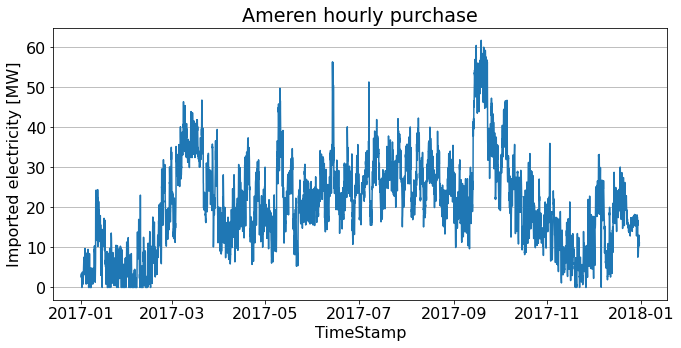

In [40]:
df = pd.read_excel("data/amerenimports_2015_2019.xlsx", skiprows=2, index_col='Time')
df.index = (df.index - pd.Timedelta(minutes=27))

mask = (df.index > '2017-1-1') & (df.index <= '2017-12-31')
newdf = df.loc[mask]
imported = newdf[['Value']].to_numpy()
index = newdf.index

print(index)

# convert to MW
imported /= 1e3

imported[imported < 0] = 0

fig, ax = plt.subplots()
plt.plot(index, imported)
# ax.yaxis.set_major_locator(MultipleLocator(10))
# ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.grid(axis='y') 
plt.ylabel('Imported electricity [MW]')
# plt.ylim([0, 9])
plt.xlabel('TimeStamp')
plt.title('Ameren hourly purchase')


## Wind

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-30 15:00:00', '2017-12-30 16:00:00',
               '2017-12-30 17:00:00', '2017-12-30 18:00:00',
               '2017-12-30 19:00:00', '2017-12-30 20:00:00',
               '2017-12-30 21:00:00', '2017-12-30 22:00:00',
               '2017-12-30 23:00:00', '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=8736, freq=None)


Text(0.5, 1.0, 'Wind hourly generation')

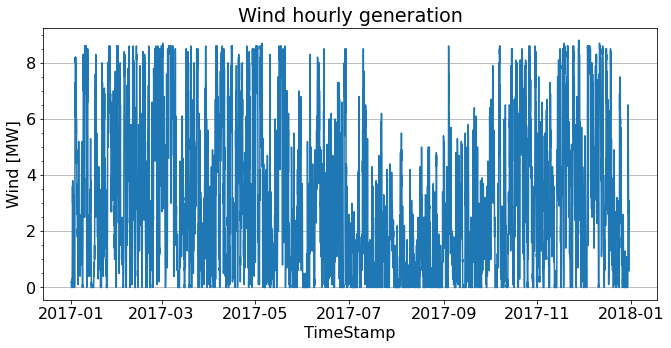

In [7]:
# Retrieve historical wind power data
df = pd.read_csv("data/railsplitter-data.csv", parse_dates=True, index_col='Time')

mask = (df.index > '2017-1-1') & (df.index <= '2017-12-31')
newdf = df.loc[mask]
wind = newdf[['MWh']].to_numpy()
index = newdf.index

print(index)

fig, ax = plt.subplots()
plt.plot(index, wind)
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.grid(axis='y') 
plt.ylabel('Wind [MW]')
# plt.ylim([0, 9])
plt.xlabel('TimeStamp')
plt.title('Wind hourly generation')
# plt.savefig('plot_wind')

## Demand

DatetimeIndex(['2017-01-01 01:00:00', '2017-01-01 02:00:00',
               '2017-01-01 03:00:00', '2017-01-01 04:00:00',
               '2017-01-01 05:00:00', '2017-01-01 06:00:00',
               '2017-01-01 07:00:00', '2017-01-01 08:00:00',
               '2017-01-01 09:00:00', '2017-01-01 10:00:00',
               ...
               '2017-12-30 15:00:00', '2017-12-30 16:00:00',
               '2017-12-30 17:00:00', '2017-12-30 18:00:00',
               '2017-12-30 19:00:00', '2017-12-30 20:00:00',
               '2017-12-30 21:00:00', '2017-12-30 22:00:00',
               '2017-12-30 23:00:00', '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', name='time', length=8736, freq=None)


Text(0.5, 1.0, 'Campus hourly electricity demand')

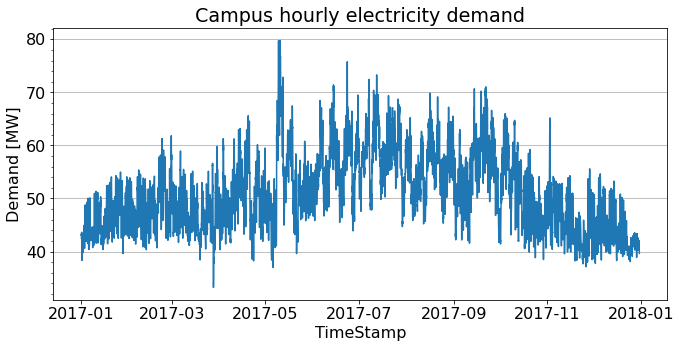

In [8]:
df = pd.read_csv("data/2014_2019_uiuc_electricity_demand.csv",
                 parse_dates=True,
                 usecols=['time', 'kw'],
                 index_col = ['time'])

mask = (df.index > '2017-1-1') & (df.index <= '2017-12-31')
newdf = df.loc[mask]
demand = newdf[['kw']].to_numpy()
index = newdf.index

print(index)

demand /= 1e3

fig, ax = plt.subplots()
plt.plot(index, demand)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(MultipleLocator(2))
ax.grid(axis='y') 
plt.ylabel('Demand [MW]')
plt.xlabel('TimeStamp')
plt.title('Campus hourly electricity demand')
# plt.savefig('plot_demand')

## Putting all together

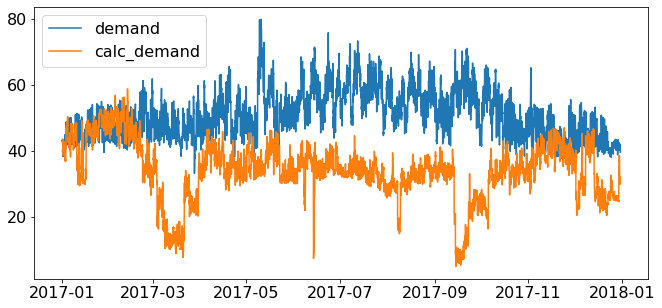

In [41]:
rsolar = np.nan_to_num(solar.reshape(len(solar), 1))

# net = demand - rsolar - abbott - imported
# plt.plot(index, net)

all_sources = rsolar + wind + abbott
plt.plot(index, demand, label='demand')
plt.plot(index, all_sources, label='calc_demand')
plt.legend()

